## This notebook is for basic dataset exploration 

    -Kaggle Height Weight Dataset is used here , Data can be downloaded using below Link

[Kaggle Dataset Link](https://www.kaggle.com/mustafaali96/weight-height#weight-height.csv) # Kaggle Account is required to download the data



In [2]:
%matplotlib inline 
import pandas as pd 
import numpy as np
from math import sqrt

# Visualization Modules
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

#Scipy Maths Models
import statsmodels.api as sm
from scipy import stats

# Machine Learning Training Modules
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [3]:
data_file = 'weight-height.csv' # make sure the path of the file is correct
df = pd.read_csv(data_file)
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


## Data Viualization :
    - Pandas lets us create graphs using its own methods
    - Or Matplotlib or other visualization modules can be used
    
[Kaggle Reference_Link](https://www.kaggle.com/martandsay/height-weight-data-visualization-using-python)

In [4]:
df.info() # information regaring the rows and columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
Gender    10000 non-null object
Height    10000 non-null float64
Weight    10000 non-null float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [5]:
df.describe() # Summary of the numerical data in the datasets
# Std deviation is the average dispersion of data points from the mean 
# it is the measure of approximate distance of data dispersion form the mean 

# Use Skewness and Kurtosis to check if the distribution type of the data , either normal distribution or not 

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc3a5469518>,
      dtype=object)

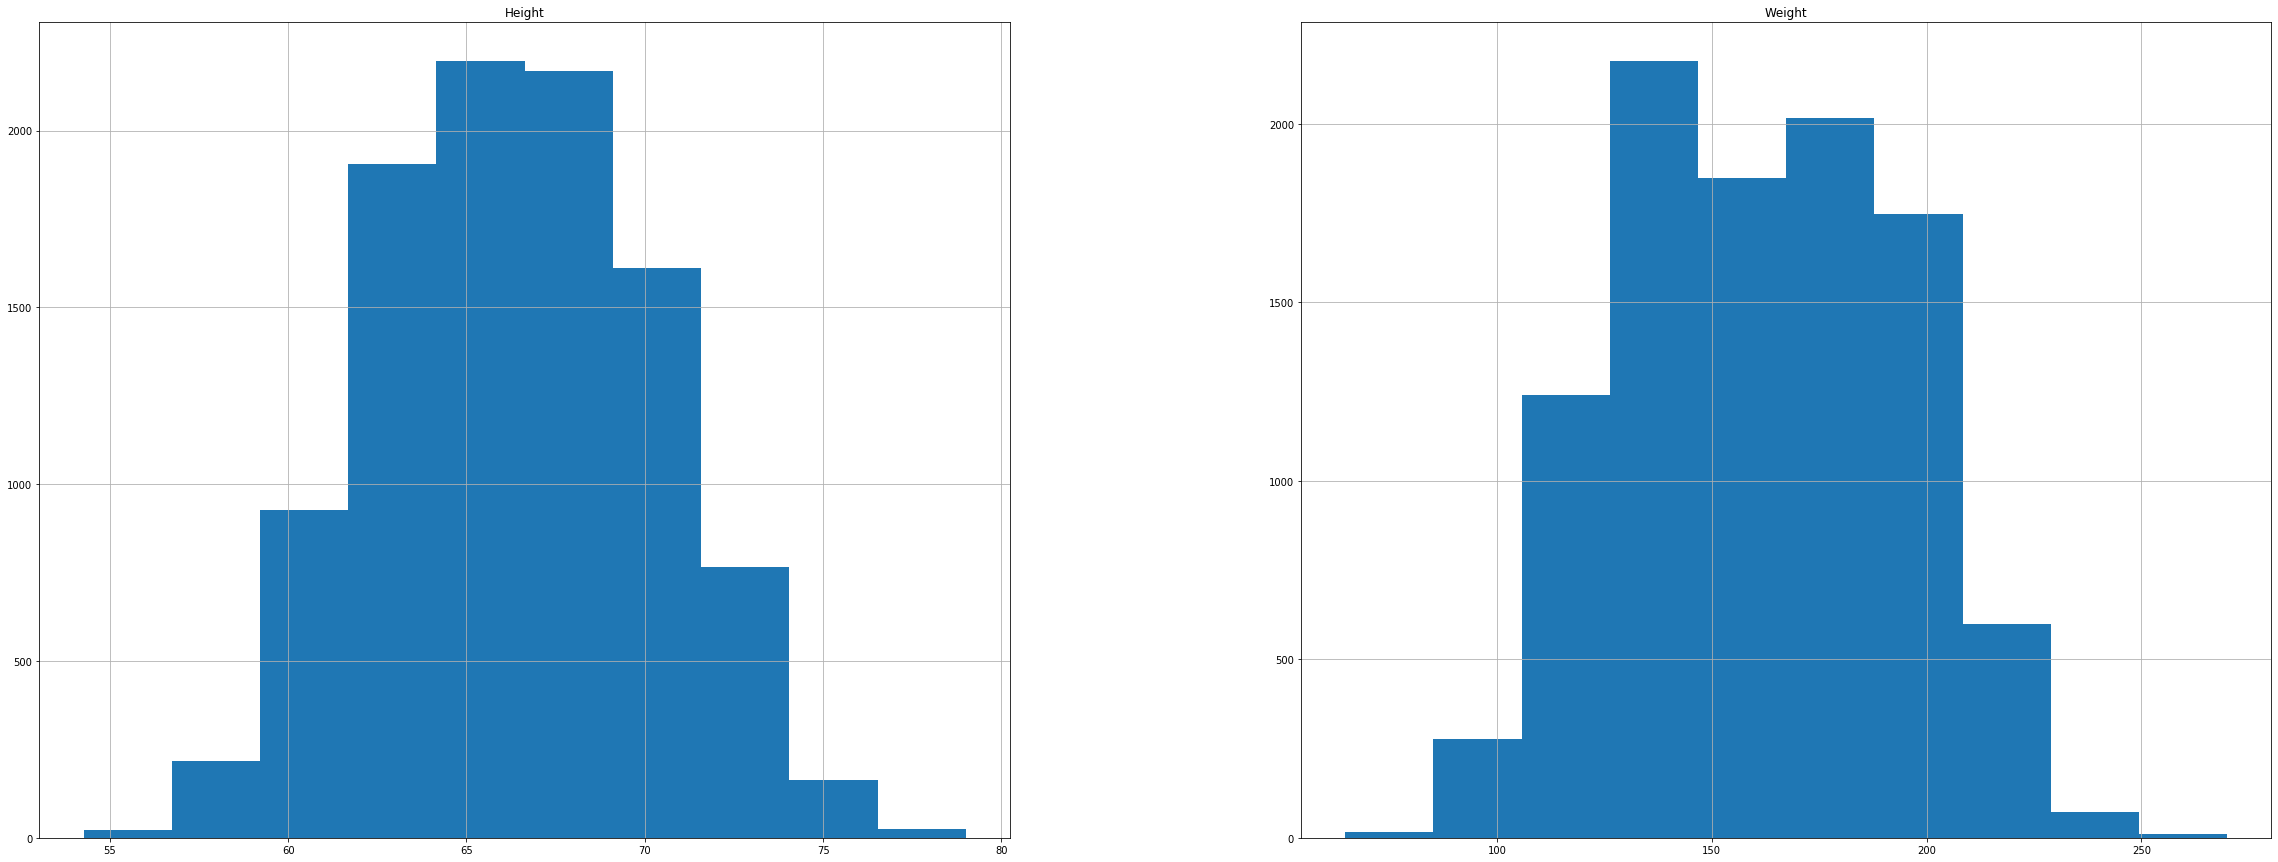

In [8]:
df.hist(figsize=(40, 15))

# Skewness and Kurtosis

In [9]:
df.skew()

Height    0.049369
Weight    0.032955
dtype: float64

In [10]:
df.kurtosis()

Height   -0.474134
Weight   -0.794618
dtype: float64

# First Look 

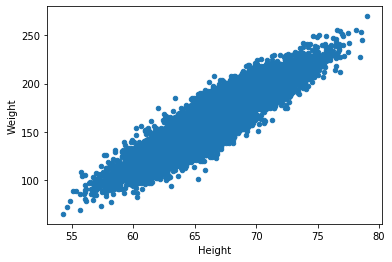

In [11]:
df.plot(x='Height', y='Weight', kind='scatter')

In [12]:
df.corr()

,Height,Weight
Height,1.000000,0.924756
Weight,0.924756,1.000000


# Outlier Detection :

Under a classical definition of an outlier as a data point outide the 1.5* IQR from the upper or lower quartile

## Boxplot using Pandas

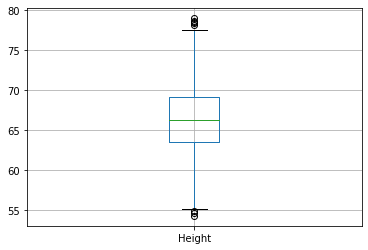

In [16]:
B= df.boxplot(['Height'])

## Boxplot using Matplotlib 

[array([54.61685783, 54.87372753, 54.26313333, 78.09586747, 78.46205292,
       78.99874235, 78.52821043, 78.62137397])]


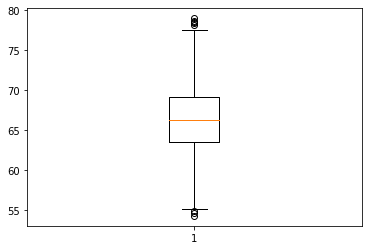

In [17]:
bp = plt.boxplot(df.Height)
outliers = [flier.get_ydata() for flier in bp["fliers"]]
boxes = [box.get_ydata() for box in bp["boxes"]]
medians = [median.get_ydata() for median in bp["medians"]]
whiskers = [whiskers.get_ydata() for whiskers in bp["whiskers"]]
print(list(outliers))

In [ ]:
# df[df['Height'].isin([54.61685783, 54.87372753, 54.26313333, 78.09586747, 78.46205292,
# #        78.99874235, 78.52821043, 78.62137397])] Try this 

In [18]:
df_1 =  df[(df.Height > 55) & (df.Height < 78)]

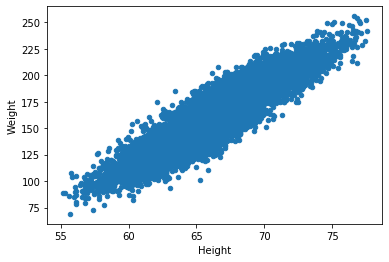

In [19]:
df_1.plot(x='Height', y='Weight', kind='scatter')

In [ ]:
bp = plt.boxplot(df_1.Height)
outliers = [flier.get_ydata() for flier in bp["fliers"]]
boxes = [box.get_ydata() for box in bp["boxes"]]
medians = [median.get_ydata() for median in bp["medians"]]
whiskers = [whiskers.get_ydata() for whiskers in bp["whiskers"]]
print(list(outliers))

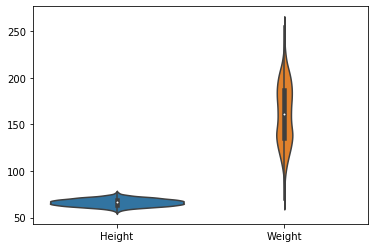

In [20]:
sns.violinplot(data=df_1)

### Sampling Dataset

/home/nandagopal/PycharmProjects/data-science-class/venv/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: This function is deprecated. Please call randint(34, 98 + 1) instead
  This is separate from the ipykernel package so we can avoid doing imports until


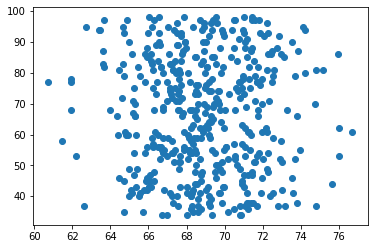

In [21]:
y = range(int(df.Height.min()), int(df.Height.max()))

y = np.random.random_integers(low = int(df.Height.min()) - 20, high = int(df.Height.max()) + 20, size = len(df.Height))

plt.scatter(x = df.Height.values[50:500], y=y[50:500])

# Normality Tests

The Shapiro-Wilk tests if a random sample came from a normal distribution. The null hypothesis of the test is the data is normally distributed. If the p value returned is less than.05, then the null hypothesis is rejected and there is evidence that the data is not from a normally distributed population.

In [22]:
stats.shapiro(df.Weight.values)

/home/nandagopal/PycharmProjects/data-science-class/venv/lib/python3.6/site-packages/scipy/stats/morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.9862456321716309, 5.538567140735469e-30)

(0.998782217502594, 0.7432982921600342)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc3a478d898>]],
      dtype=object)

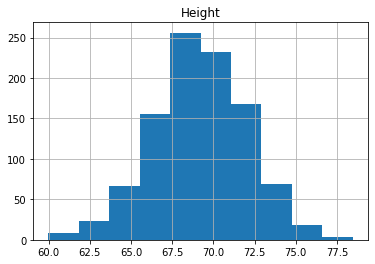

In [23]:
print(stats.shapiro(df.Weight.values[1000:2000]))
df[['Height']][1000:2000].hist()